# *Tracking Nonstationary Bandit Problem*
The Tracking Nonstationary Bandit Problem is a variant of the Multi-Armed Bandit (MAB) problem where the reward distribution of each arm changes over time. The goal is to adjust to these changes efficiently, often by employing an algorithm like Sliding Window UCB (SW-UCB)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sliding window UCB
Sliding Window UCB Algorithm: This algorithm maintains a sliding window of rewards for each arm to estimate its mean reward and balances exploration and exploitation using the UCB formula.

In [2]:
class SlidingWindowUCB:
  def __init__(self, n_arms, window_size, alpha=0.1):
    self.n_arms = n_arms
    self.window_size = window_size
    self.alpha = alpha
    self.counts = np.zeros(n_arms) # Number of times each arm was pulled
    self.rewards = np.zeros(n_arms) # total reward of each arm
    self.reward_history = [[] for _ in range(n_arms)] # Reward history within the sliding window

  def select_arm(self):
    # select arm based on UCB
    ucb_values = np.zeros(self.n_arms)
    total_counts = np.sum(self.counts)

    for arm in range(self.n_arms):
      if self.counts[arm] == 0:
        return arm # Explore untried arms first
      else:
        # Average reward within the sliding window
        window_rewards = np.array(self.reward_history[arm][-self.window_size:])
        avg_reward = np.mean(window_rewards) if len(window_rewards) > 0 else 0
        #calculate UCB value
        ucb_values[arm] = avg_reward + self.alpha * np.sqrt(np.log(total_counts) / (self.counts[arm] + 1e-10))

    return np.argmax(ucb_values)

  def update(self, chosen_arm, reward):
    #update counts and rewards
    self.counts[chosen_arm] += 1
    self.rewards[chosen_arm] += reward
    self.reward_history[chosen_arm].append(reward)

    #keep history within the window size
    if len(self.reward_history[chosen_arm]) > self.window_size:
      self.reward_history[chosen_arm].pop(0)


# Simulating the nonstationary bandit problem

In [3]:
class NonStationaryBandit:
  def __init__(self, n_arms, means, drift=0.01):
    self.n_arms = n_arms
    self.means = np.array(means)
    self.drift = drift

  def pull(self, arm):
    #simulate pulling an arm with gaussian reward
    reward = np.random.randn() +self.means[arm]
    #update means to simulate nonstationarity
    self.means += np.random.randn(self.n_arms) * self.drift
    return reward

def run_simulation(n_arms, means, drift, time_steps, window_size, alpha):
  bandit = NonStationaryBandit(n_arms=n_arms, means=means, drift=drift)
  agent = SlidingWindowUCB(n_arms=n_arms, window_size=window_size, alpha=alpha)

  rewards = np.zeros(time_steps)
  for t in range(time_steps):
    chosen_arm = agent.select_arm()
    reward = bandit.pull(chosen_arm)
    agent.update(chosen_arm, reward)
    rewards[t] = reward

  return rewards

In [4]:
n_arms = 5
means = [1, 1.5, 1.0, 0.8, 1.2] #initial means for the arms
drift = 0.2 # Drift in the means to simulate nonstationarity
time_steps = 1000 # Number of time steps
window_size = 50 # size fo the sliding window for SW-UCB
alpha = 0.1 # Exploration-Exploitation paramter

In [5]:
# Run simulation
rewards = run_simulation(n_arms, means, drift, time_steps, window_size, alpha)

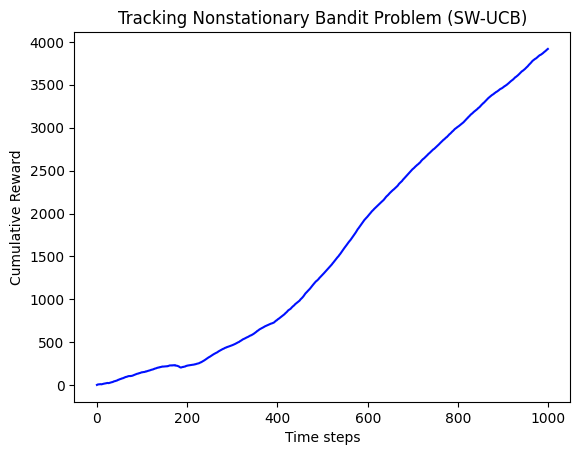

In [11]:
# Plot cumulative rewards
cumulative_rewards = np.cumsum(rewards)
color = sns.color_palette("hsv", n_arms)
sns.lineplot(cumulative_rewards, color=color[3])
plt.xlabel('Time steps')
plt.ylabel('Cumulative Reward')
plt.title('Tracking Nonstationary Bandit Problem (SW-UCB)')
plt.show()

 increasing trend of the cumulative reward, it seems that the algorithm is successfully learning and adapting to the nonstationary environment over time.